In [1]:
#installing yolov8
!pip install ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.2/755.2 kB 10.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [1]:
#Mounting my google drive inorder to access the dataset for training, testing and validation
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/Dataset

/content/drive/MyDrive/Dataset


In [4]:
!ls

data.yaml  runs  test  train  valid  yolov8n.pt


In [5]:
#performing the custom training of the model with respect to the custom dataset
%cd /content/drive/MyDrive/Dataset
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=5 imgsz=640 plots=True save=True

/content/drive/MyDrive/Dataset
Ultralytics YOLOv8.2.8 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

In [ ]:
#In the scenario where you want to change the weight and bias of the convolutional layers, we can use this.
import torch
from models.yolo import Model

# Instantiate the YOLOv8 model
model = Model()

# Traverse through the layers of the model
for name, layer in model.named_modules():
    if isinstance(layer, torch.nn.Conv2d):
        # Access the weights and biases of each convolutional layer
        weights = layer.weight
        biases = layer.bias
        # Modify the weights and biases as needed

In [6]:
#Performing validation on the model using the custom dataset
!yolo task=detect mode=val model=runs/detect/train4/weights/best.pt data=data.yaml

Ultralytics YOLOv8.2.8 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/Dataset/valid/labels.cache... 238 images, 0 backgrounds, 0 corrupt: 100% 238/238 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/drive/MyDrive/Dataset/valid/images/bandsintown_com_png_jpg.rf.9e4140fe6d807873bd07a1cb59406a76.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Dataset/valid/images/deondernemer_nl_png_jpg.rf.284ae8aa13008ba4e4f90daef18cc43c.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Dataset/valid/images/flickr_com_png_jpg.rf.0c40aba88a23916f9c29c1ac2554eded.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Dataset/valid/images/foxnews_com_png_jpg.rf.d8ff3dc4e39436df340d53cc18fb7e45.jpg: 2 duplicate labels removed
val: WARNING ⚠️ /content/drive/MyDrive/Dataset/valid/images/g2a_com_png_jpg.rf.1e9c198572125ed0f12f46

In [7]:
#Using the testing images in the custom dataset on the model which has been trained using custom dataset
!yolo task=detect mode=predict model=runs/detect/train4/weights/best.pt conf=0.25 source=test/images

Ultralytics YOLOv8.2.8 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007208 parameters, 0 gradients, 8.1 GFLOPs

image 1/119 /content/drive/MyDrive/Dataset/test/images/addons_mozilla_org_png_jpg.rf.6b5201a6b0e8637a93fcba4f775d5ac0.jpg: 480x640 11 buttons, 1 field, 4 headings, 4 images, 1 text, 64.0ms
image 2/119 /content/drive/MyDrive/Dataset/test/images/adf_ly_png_jpg.rf.c833b461e3af97e7387d265cf947e0b0.jpg: 480x640 14 buttons, 9 headings, 3 images, 2 texts, 22.5ms
image 3/119 /content/drive/MyDrive/Dataset/test/images/advancedcustomfields_com_png_jpg.rf.c0a2171ac5aff3d39dbc46c4c2f9e06d.jpg: 480x640 7 buttons, 2 headings, 1 image, 1 link, 2 texts, 9.8ms
image 4/119 /content/drive/MyDrive/Dataset/test/images/ajax_googleapis_com_png_jpg.rf.b097fe3a01347bb06c4b65df1a188c94.jpg: 480x640 4 buttons, 2 links, 7 texts, 7.7ms
image 5/119 /content/drive/MyDrive/Dataset/test/images/amazon_es_png_jpg.rf.5ae21cf4a3b96dd165ff8b5796730930.jpg: 480

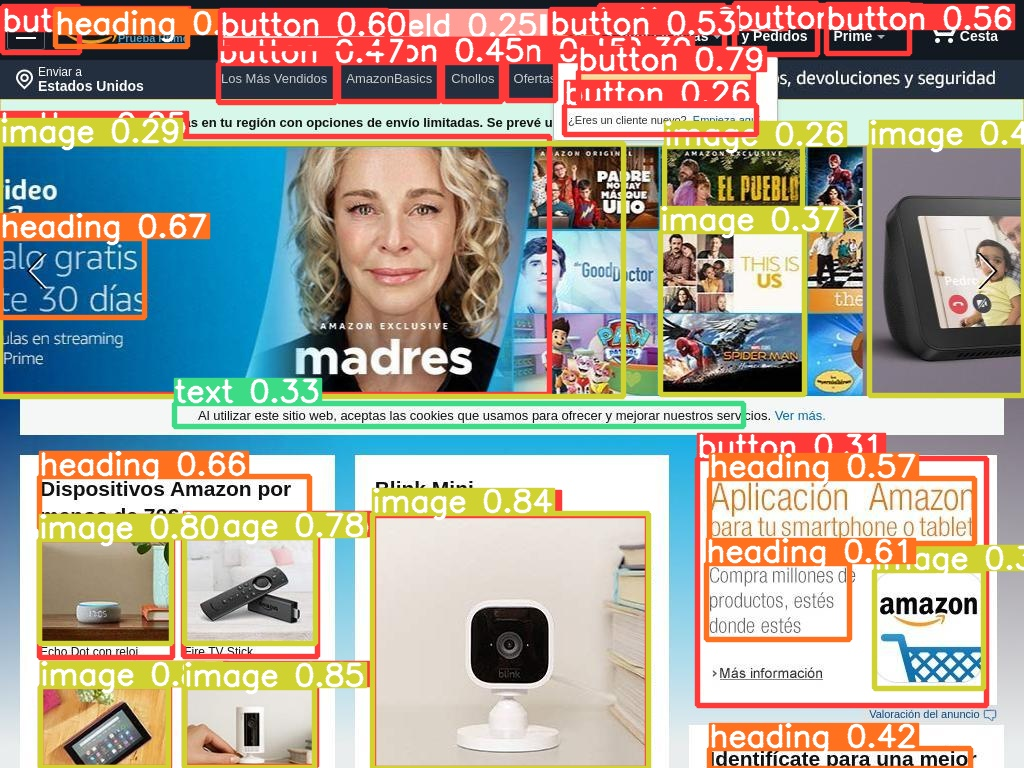

In [3]:
#Getting the images of the output from my google drive
import glob
from IPython.display import Image, display
display(Image(filename="/content/drive/MyDrive/Dataset/runs/detect/predict/amazon_es_png_jpg.rf.5ae21cf4a3b96dd165ff8b5796730930.jpg",width=600))

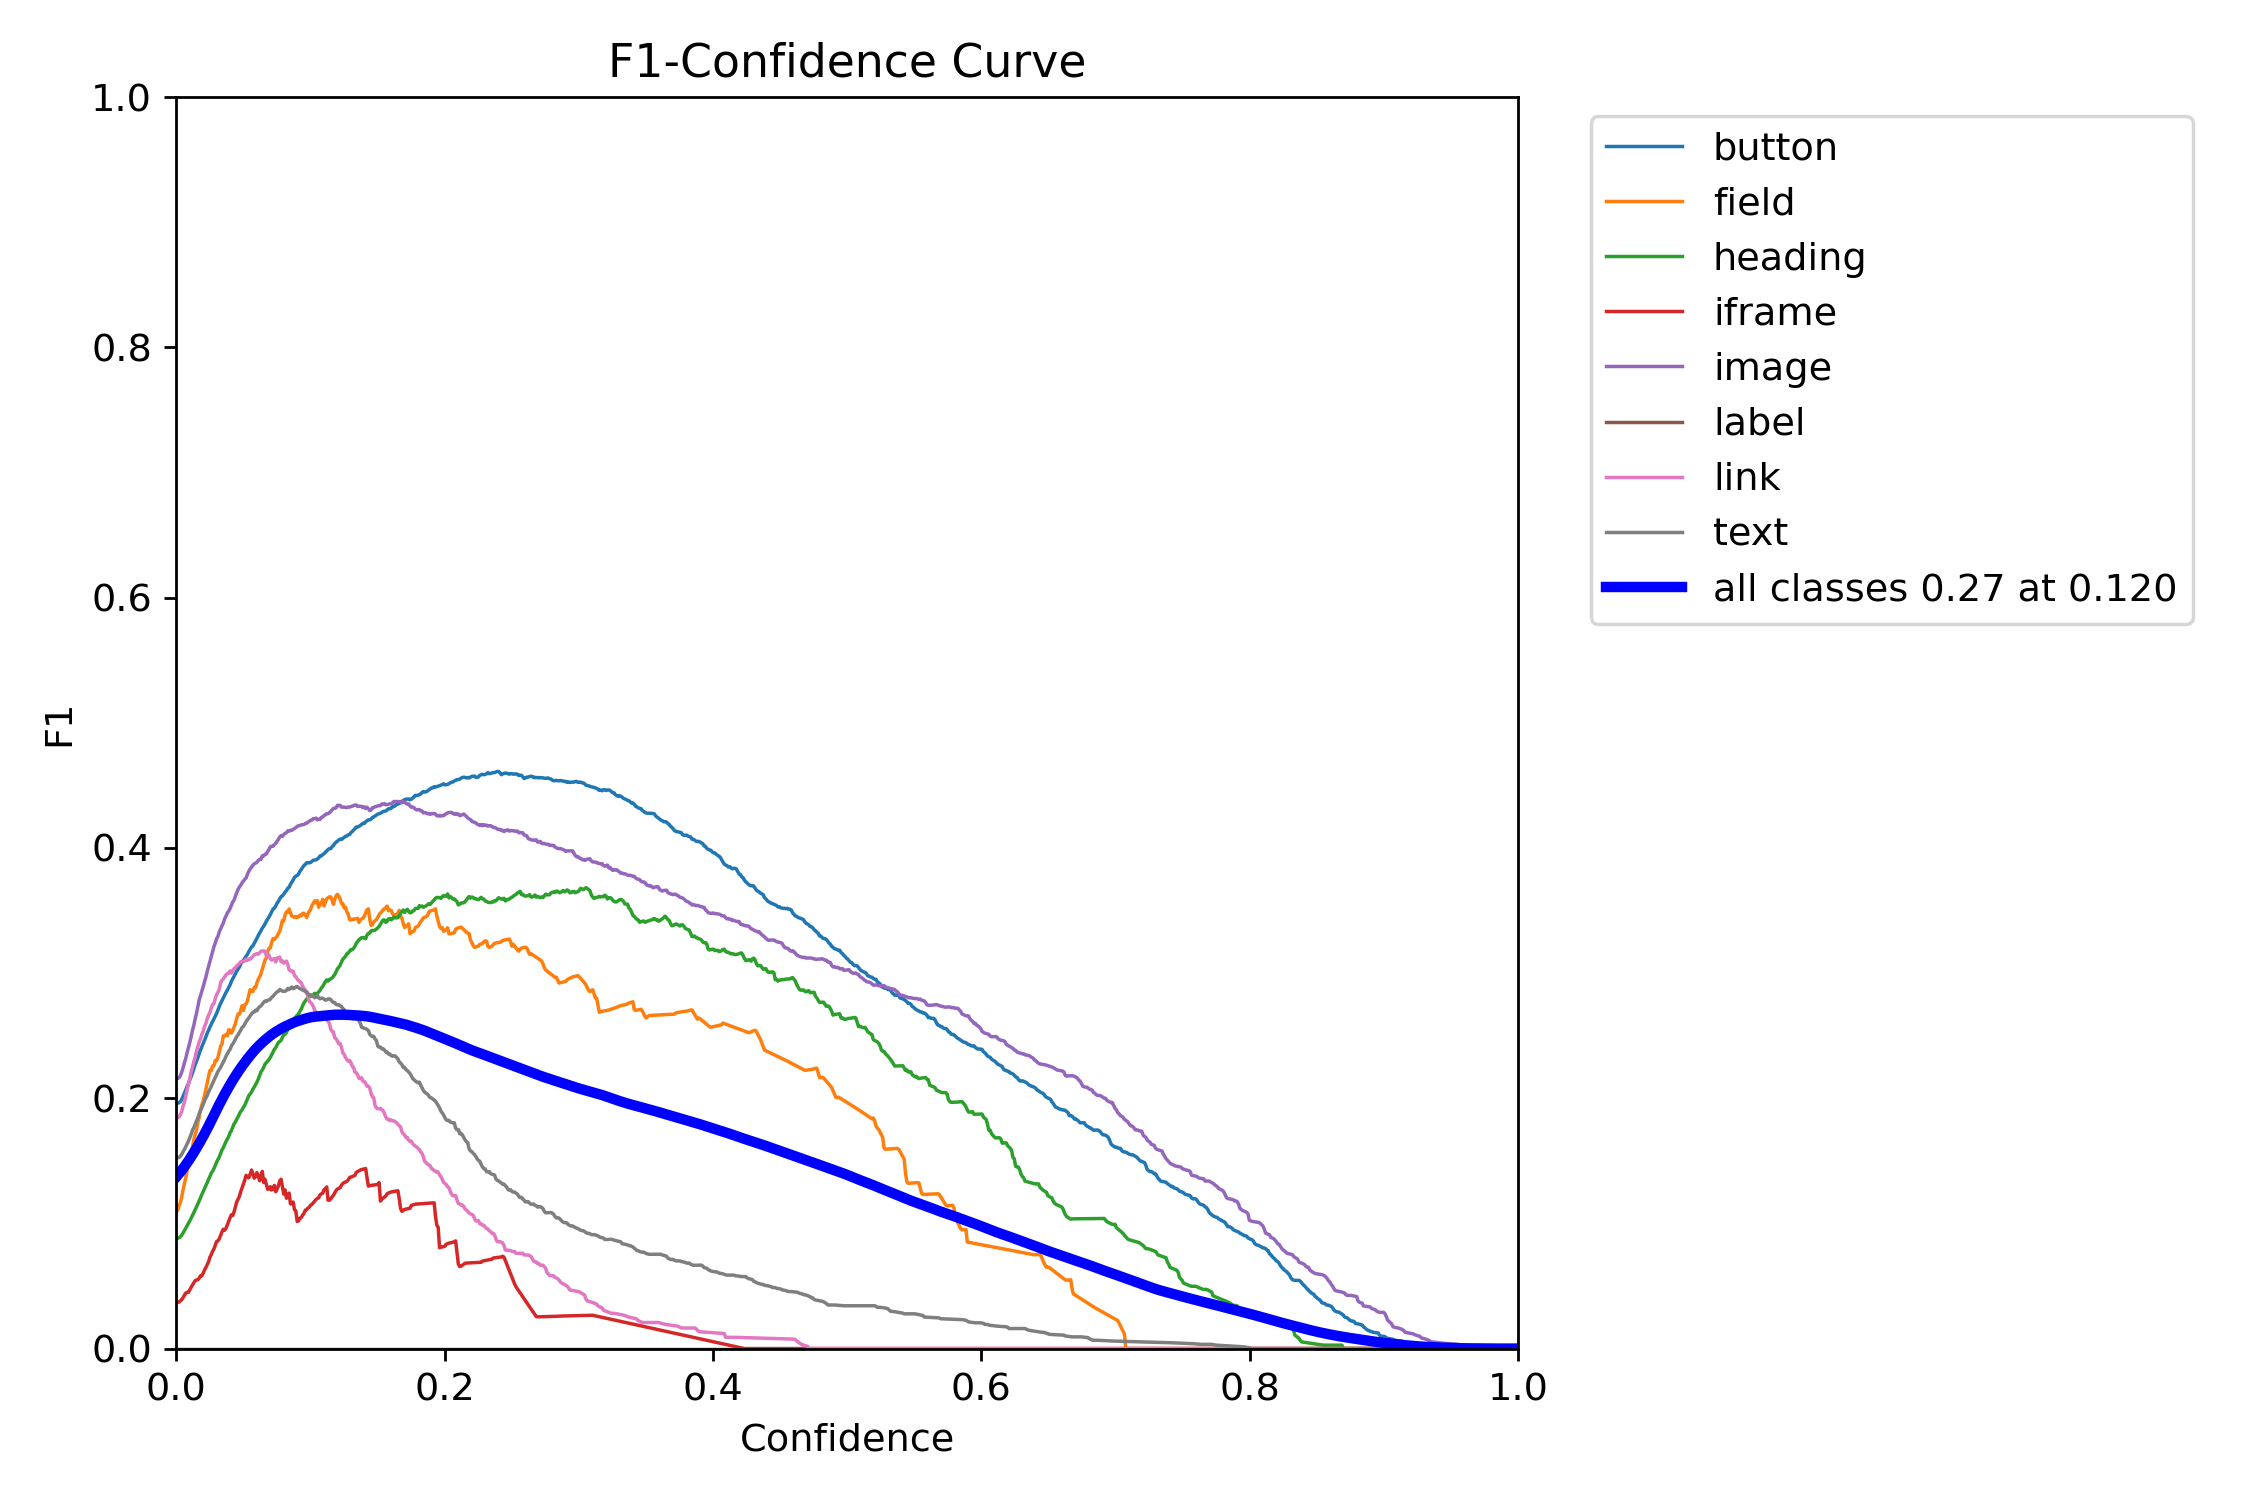

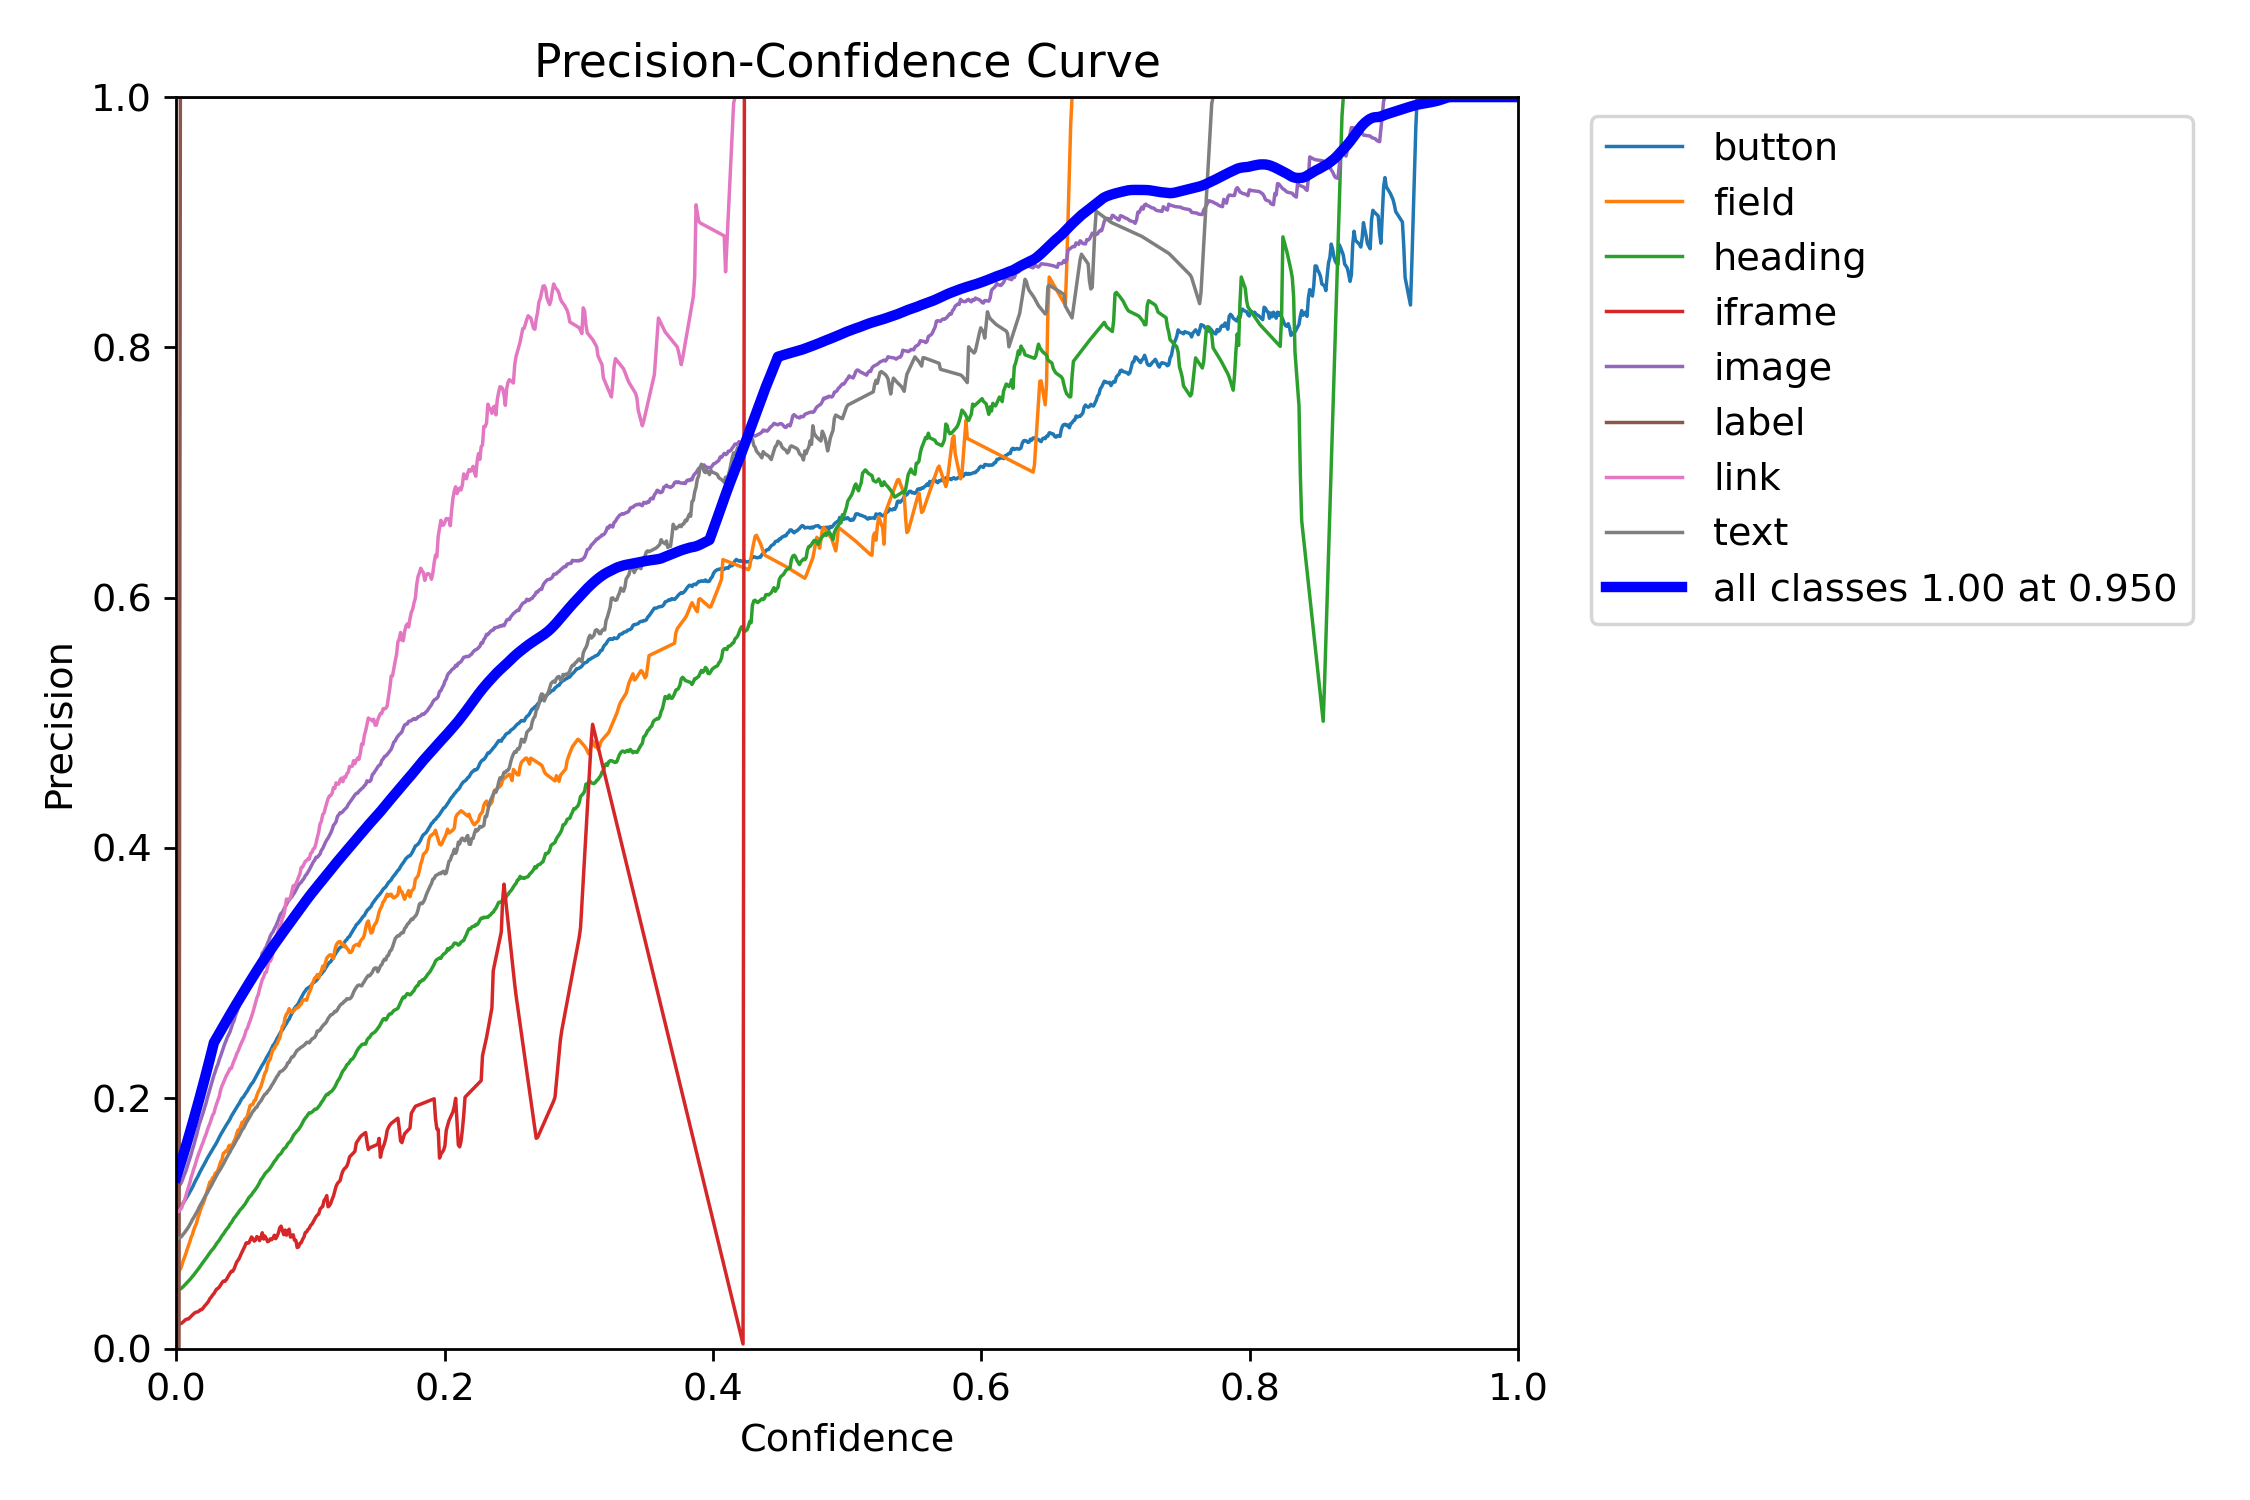

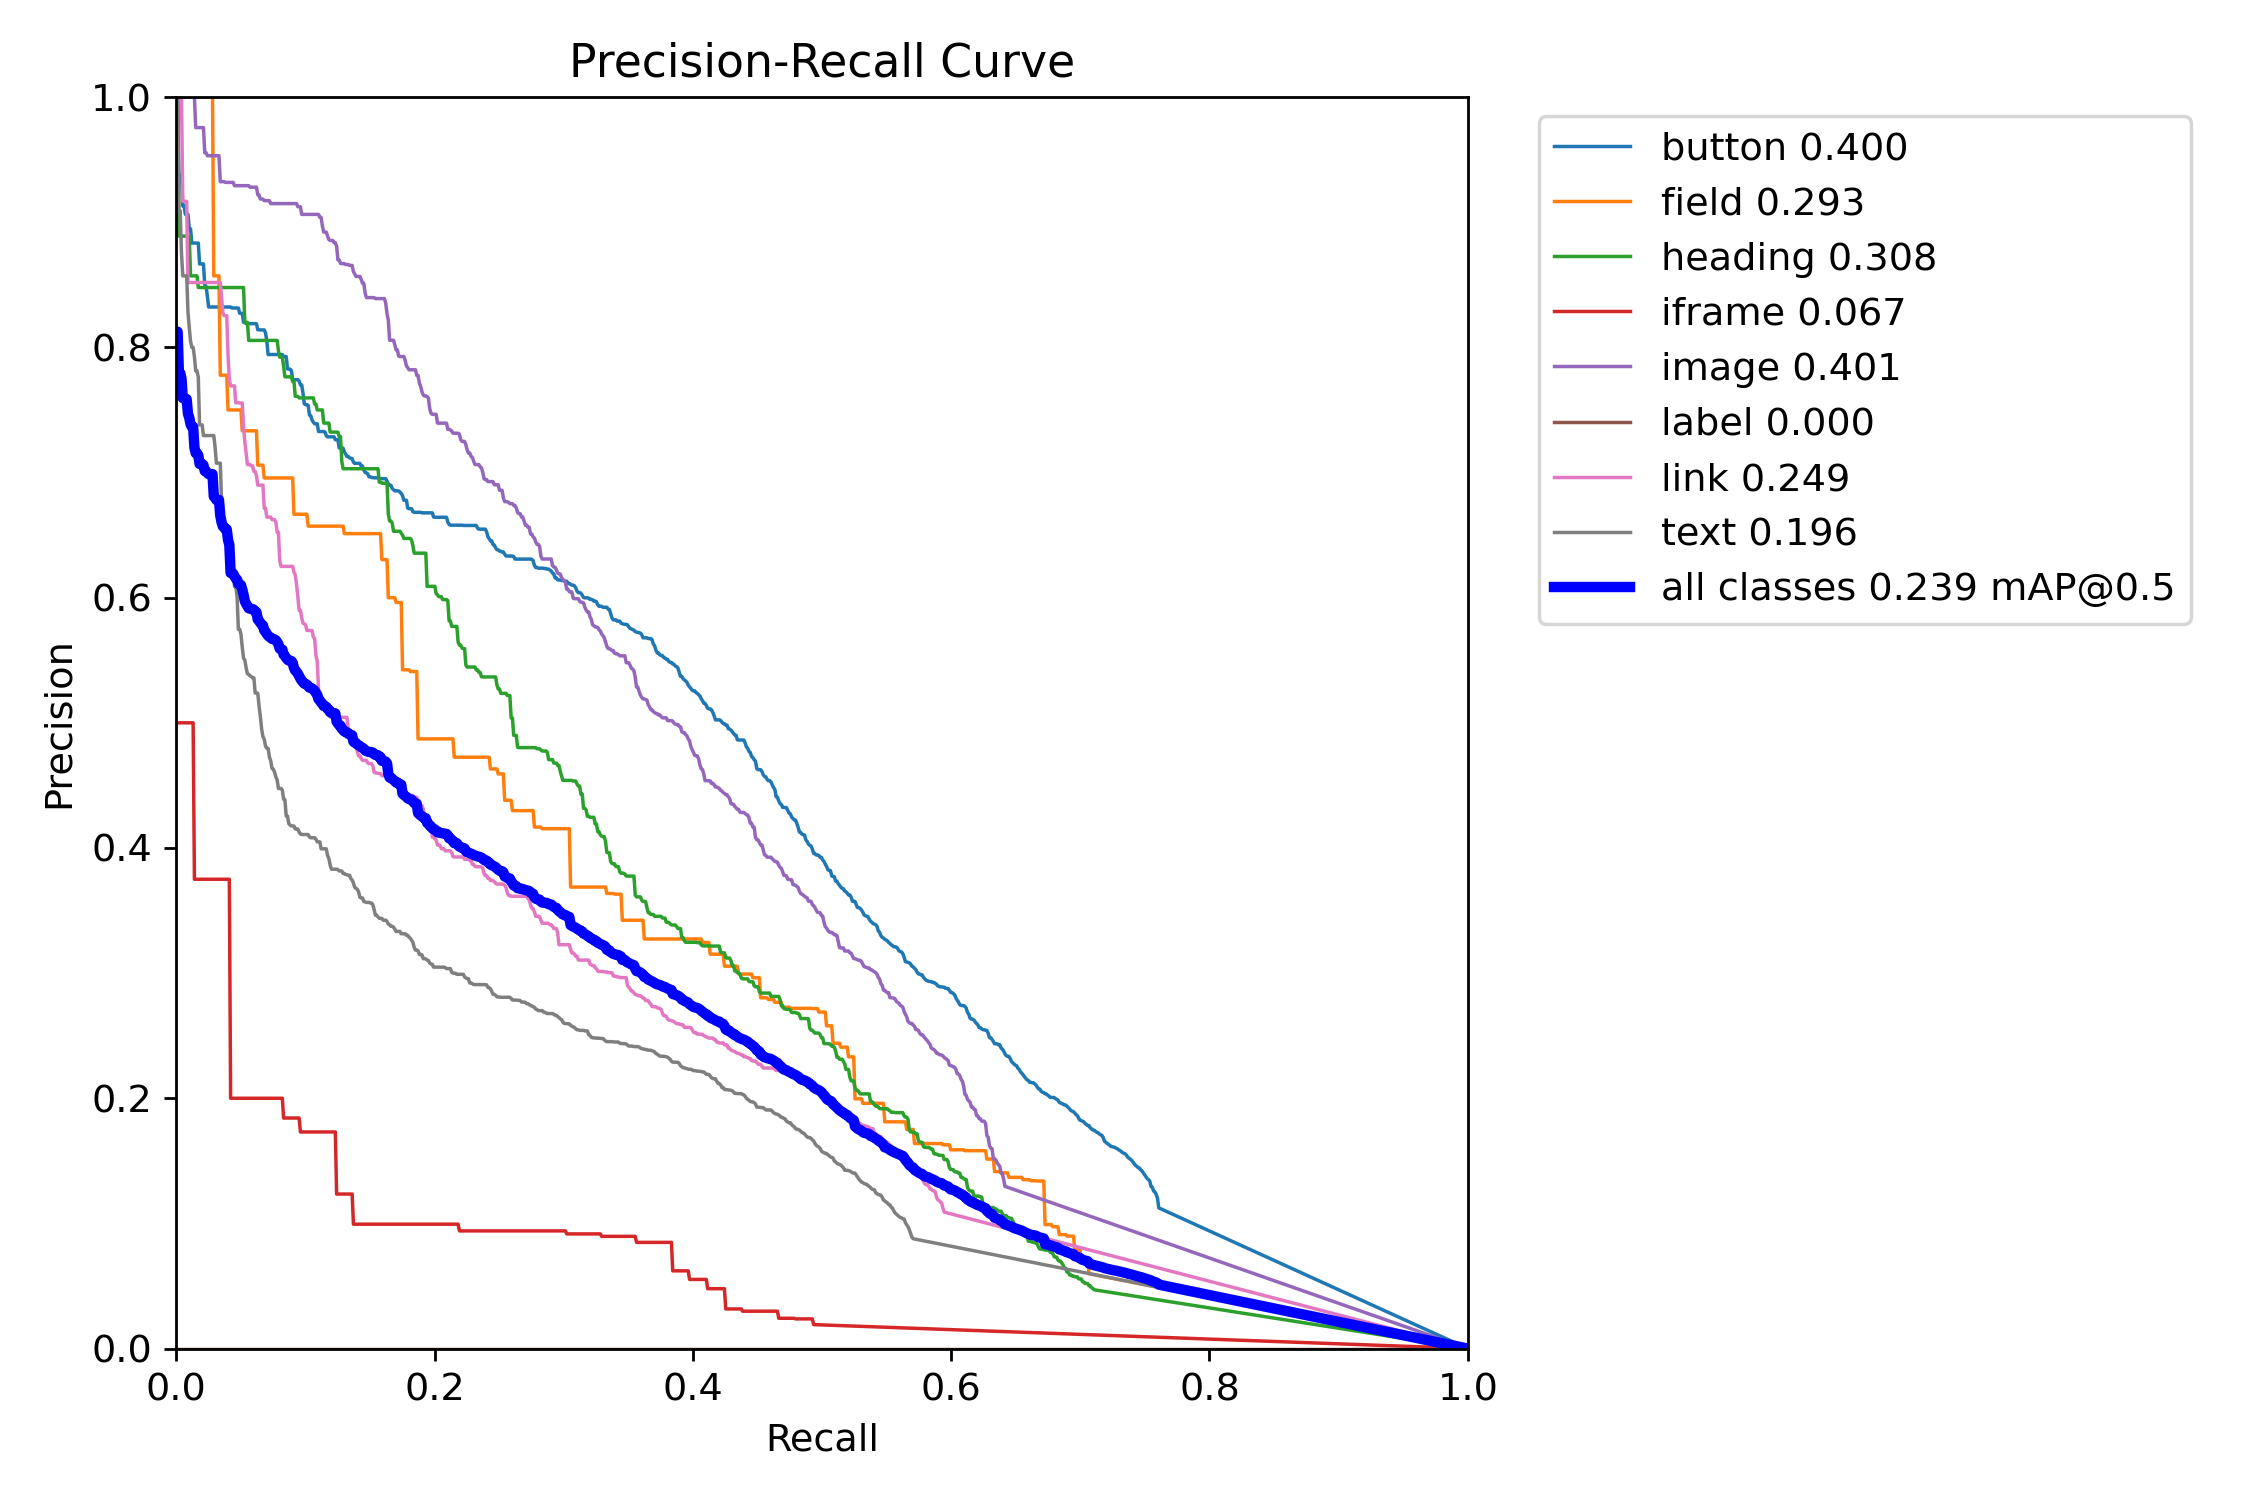

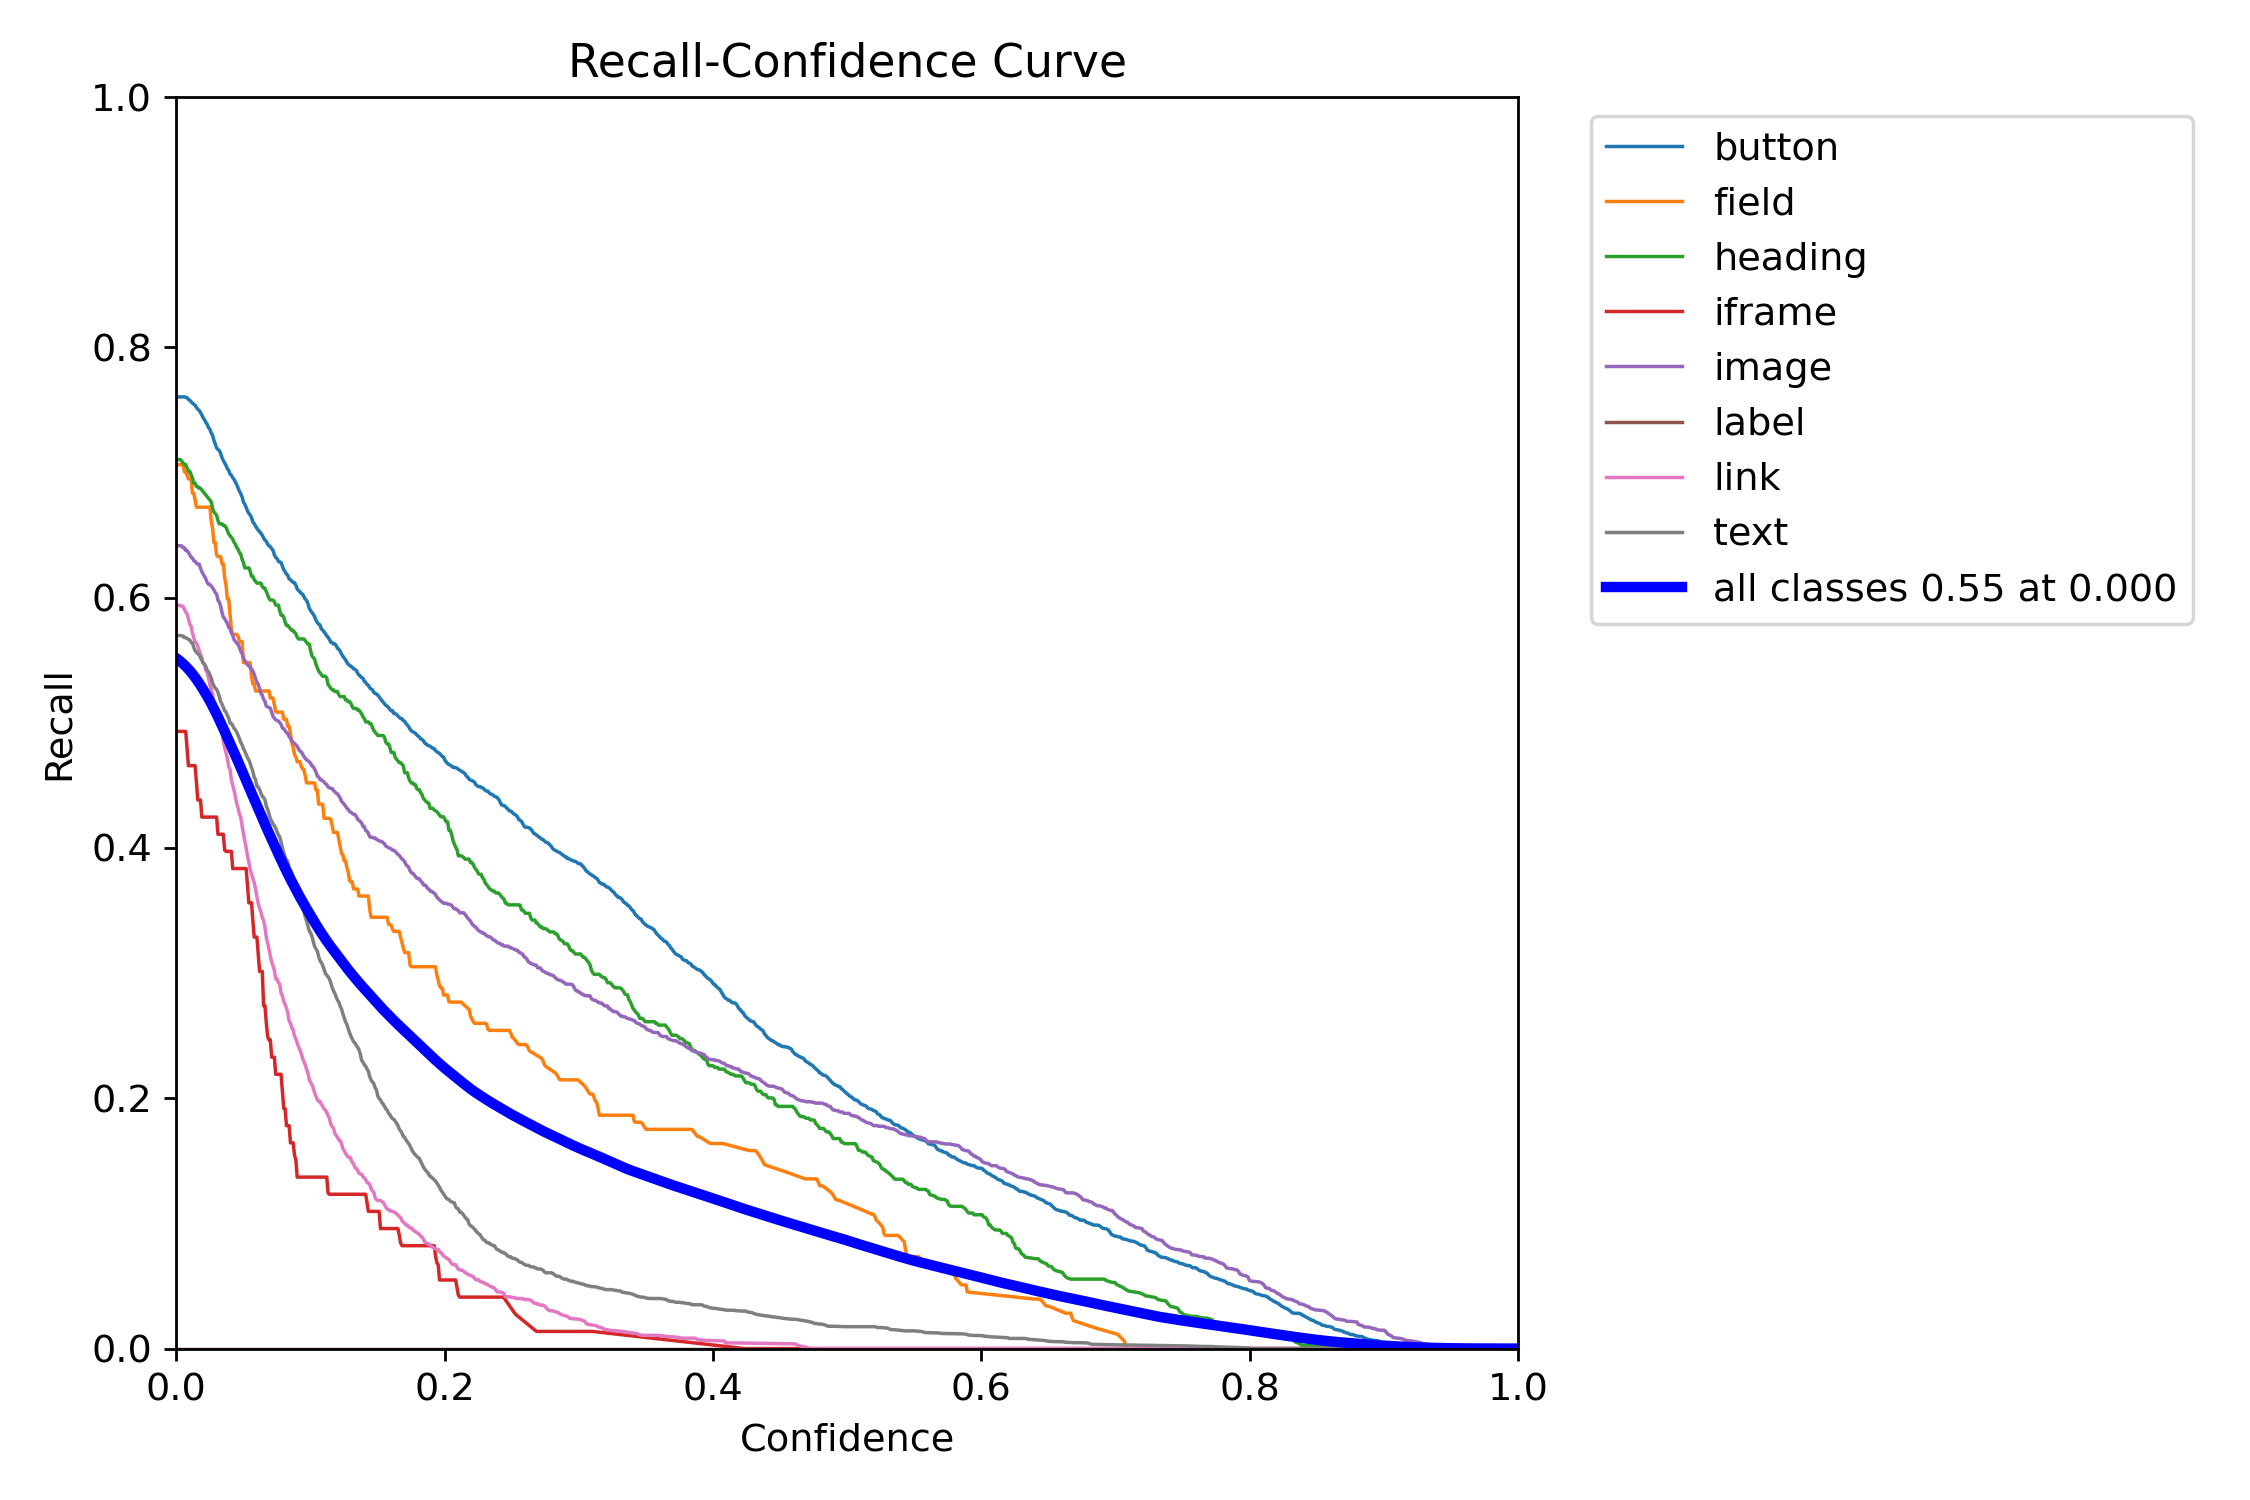

In [9]:
#Viewing the performance of the model
display(Image(filename="/content/drive/MyDrive/Dataset/runs/detect/val/F1_curve.png",width=600))
display(Image(filename="/content/drive/MyDrive/Dataset/runs/detect/val/P_curve.png",width=600))
display(Image(filename="/content/drive/MyDrive/Dataset/runs/detect/val/PR_curve.png",width=600))
display(Image(filename="/content/drive/MyDrive/Dataset/runs/detect/val/R_curve.png",width=600))
